In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets,transforms

import seaborn as sns

%matplotlib inline

In [2]:
data_path = os.path.join(os.getcwd(), "data", "bank_marketing")

In [3]:
train_df = pd.read_csv(data_path + "/bank_marketing_train.csv")

In [4]:
train_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
train_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,40.000941,258.854299,2.558314,962.537131,0.172620,0.084820,93.575129,-40.491921,3.624562,5167.147431
std,10.410233,259.167585,2.732370,186.757655,0.493482,1.570037,0.578020,4.629348,1.734087,72.197238
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
train_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
num_cols = []
for i in train_df:
    if train_df[i].dtypes == 'int64' or train_df[i].dtypes == 'float64':
        num_cols.append(i)
        
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [8]:
remove_list = ['duration', 'pdays', 'nr.employed', 'campaign', 'previous']
for r in remove_list:
    num_cols.remove(r)
    
num_cols


['age', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [9]:
y = train_df.loc[:, 'y']
y = (y=='yes').astype(int)

y

0        0
1        0
2        0
3        0
4        0
        ..
32946    1
32947    0
32948    0
32949    1
32950    0
Name: y, Length: 32951, dtype: int64

In [10]:
df = train_df.loc[:, num_cols]

In [11]:
df.describe()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,40.000941,0.084820,93.575129,-40.491921,3.624562
std,10.410233,1.570037,0.578020,4.629348,1.734087
min,17.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.000000,1.400000,93.994000,-36.400000,4.961000
max,98.000000,1.400000,94.767000,-26.900000,5.045000


In [12]:
df = df.join(y)

<Axes: >

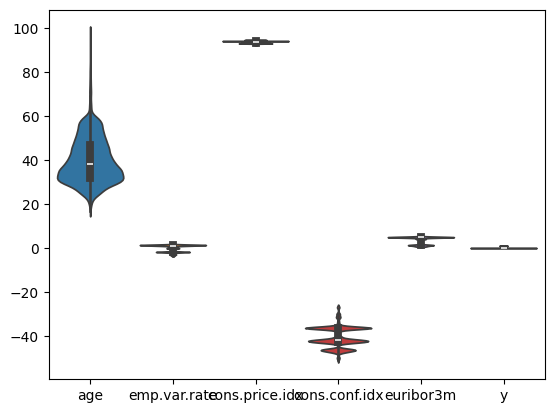

In [13]:
sns.violinplot(df)

In [14]:
df.corr()

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
age,1.000000,-0.003448,-0.002470,0.130212,0.008140,0.030903
emp.var.rate,-0.003448,1.000000,0.775061,0.195770,0.972200,-0.293160
cons.price.idx,-0.002470,0.775061,1.000000,0.057959,0.687986,-0.134374
cons.conf.idx,0.130212,0.195770,0.057959,1.000000,0.276995,0.049696
euribor3m,0.008140,0.972200,0.687986,0.276995,1.000000,-0.301816
y,0.030903,-0.293160,-0.134374,0.049696,-0.301816,1.000000


<Axes: >

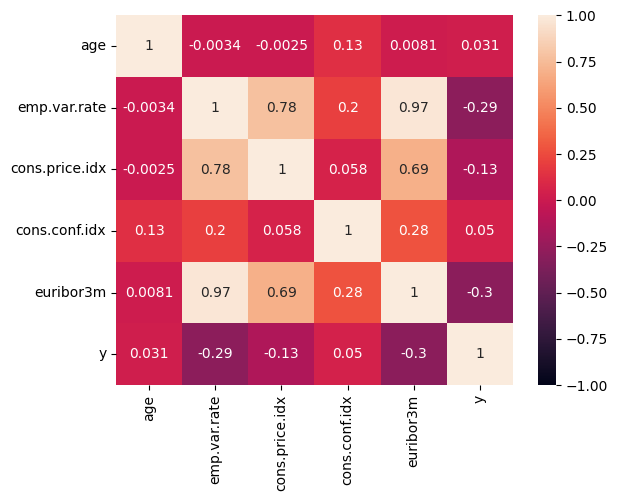

In [15]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [16]:
df_on_y = df.drop(['y'], axis=1)

In [17]:
df_on_y

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,1.1,93.994,-36.4,4.857
1,57,1.1,93.994,-36.4,4.857
2,37,1.1,93.994,-36.4,4.857
3,40,1.1,93.994,-36.4,4.857
4,45,1.1,93.994,-36.4,4.857
...,...,...,...,...,...
32946,73,-1.1,94.767,-50.8,1.028
32947,46,-1.1,94.767,-50.8,1.028
32948,56,-1.1,94.767,-50.8,1.028
32949,44,-1.1,94.767,-50.8,1.028


In [18]:
df

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,1.1,93.994,-36.4,4.857,0
1,57,1.1,93.994,-36.4,4.857,0
2,37,1.1,93.994,-36.4,4.857,0
3,40,1.1,93.994,-36.4,4.857,0
4,45,1.1,93.994,-36.4,4.857,0
...,...,...,...,...,...,...
32946,73,-1.1,94.767,-50.8,1.028,1
32947,46,-1.1,94.767,-50.8,1.028,0
32948,56,-1.1,94.767,-50.8,1.028,0
32949,44,-1.1,94.767,-50.8,1.028,1


In [19]:
norm_df = (df_on_y-df_on_y.mean())/df_on_y.std()

In [20]:
norm_df

,age,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,1.536859,0.646596,0.724665,0.883909,0.710713
1,1.632918,0.646596,0.724665,0.883909,0.710713
2,-0.288268,0.646596,0.724665,0.883909,0.710713
3,-0.000090,0.646596,0.724665,0.883909,0.710713
4,0.480206,0.646596,0.724665,0.883909,0.710713
...,...,...,...,...,...
32946,3.169867,-0.754644,2.061988,-2.226680,-1.497365
32947,0.576266,-0.754644,2.061988,-2.226680,-1.497365
32948,1.536859,-0.754644,2.061988,-2.226680,-1.497365
32949,0.384147,-0.754644,2.061988,-2.226680,-1.497365


<Axes: >

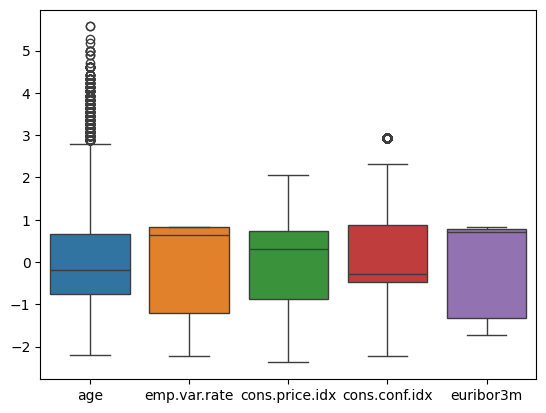

In [21]:
sns.boxplot(norm_df)

In [22]:
x = torch.Tensor(torch.tensor(norm_df.values)).float()
y = torch.Tensor(torch.tensor(y.values)).float()

In [23]:
x.type()

'torch.FloatTensor'

In [24]:
data_tensor = TensorDataset(x, y)
data_loader = DataLoader(data_tensor, batch_size=8)

In [25]:
# create ANN model for MNIST 
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(5, 64)
        
        self.hidden_layer_01 = nn.Linear(64,64)
        self.hidden_layer_02 = nn.Linear(64,32)
        
        self.output = nn.Linear(32,1)
        
    def forward(self, x):
        # x = torch.flatten(x, start_dim=1) # Because data shape is (28*28) for ANN must at first flatten
        x = F.relu(self.input(x))
        x = F.relu(self.hidden_layer_01(x))
        x = F.relu(self.hidden_layer_02(x))
        x = self.output(x)   
        return torch.flatten(x)
        

In [35]:
net = Net()
loss = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

In [33]:
# train function 
def train(epoch):
    train_accuracy  = []
    test_accuracy = []
    losses  = torch.zeros(epoch)
    
    for epochi in range(epoch):
        batch_accuracy  = []
        batch_loss = []

        for X,y in data_loader:
            yHAT = net(X)
            lossfun = loss(yHAT, y)

            optimizer.zero_grad()
            lossfun.backward()
            optimizer.step()

            batch_loss.append(lossfun.item())
            batch_accuracy.append( 100*torch.mean( (torch.Tensor(torch.sigmoid(yHAT)>.5).float() == y ).float()) )

        losses[epochi] = np.mean(batch_loss)
        train_accuracy.append(np.mean(batch_accuracy))
            
        print("Epoch: {}, Loss:  {:.4f}, Train Accuracy: {:.2f}% ;".format(epochi + 1, losses[epochi].item(), train_accuracy[epochi]))
        
        
    return net, losses, train_accuracy, test_accuracy

In [36]:
# train ANN model
net, losses, train_accuracy, test_accuracy = train(100)

Epoch: 1, Loss:  0.3225, Train Accuracy: 88.78% ;
Epoch: 2, Loss:  0.2948, Train Accuracy: 88.86% ;
Epoch: 3, Loss:  0.2913, Train Accuracy: 88.86% ;
Epoch: 4, Loss:  0.2907, Train Accuracy: 88.82% ;
Epoch: 5, Loss:  0.2904, Train Accuracy: 88.83% ;
Epoch: 6, Loss:  0.2902, Train Accuracy: 88.79% ;
Epoch: 7, Loss:  0.2900, Train Accuracy: 88.78% ;
Epoch: 8, Loss:  0.2897, Train Accuracy: 88.77% ;
Epoch: 9, Loss:  0.2894, Train Accuracy: 88.79% ;
Epoch: 10, Loss:  0.2891, Train Accuracy: 88.79% ;
Epoch: 11, Loss:  0.2888, Train Accuracy: 88.83% ;
Epoch: 12, Loss:  0.2885, Train Accuracy: 88.87% ;
Epoch: 13, Loss:  0.2883, Train Accuracy: 88.86% ;
Epoch: 14, Loss:  0.2880, Train Accuracy: 88.83% ;
Epoch: 15, Loss:  0.2877, Train Accuracy: 88.82% ;
Epoch: 16, Loss:  0.2875, Train Accuracy: 88.84% ;
Epoch: 17, Loss:  0.2872, Train Accuracy: 88.85% ;
Epoch: 18, Loss:  0.2870, Train Accuracy: 88.87% ;
Epoch: 19, Loss:  0.2868, Train Accuracy: 88.86% ;
Epoch: 20, Loss:  0.2866, Train Accuracy

Text(0.5, 0.98, 'ANN MNIST 100 epoch')

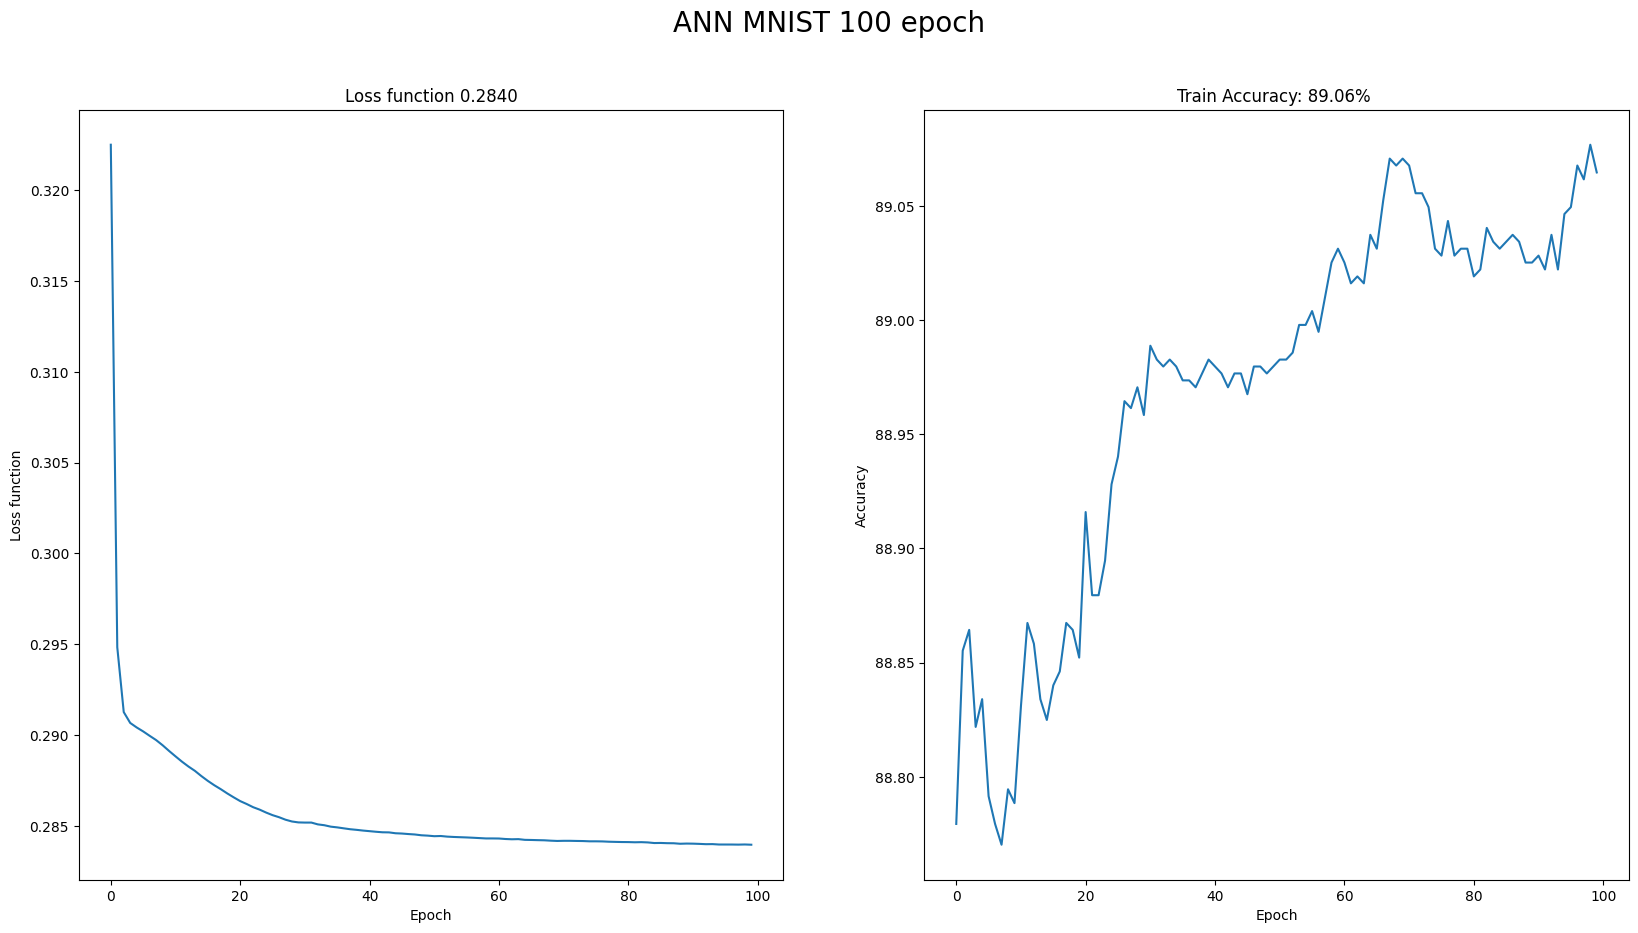

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
axs[0].plot(losses)
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Loss function")
axs[0].set_title("Loss function {:.4f}".format(losses[-1]))

axs[1].plot(train_accuracy)
axs[1].plot(test_accuracy)
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Train Accuracy: {:.2f}% ".format(train_accuracy[-1]))

plt.suptitle("ANN MNIST 100 epoch", fontsize=20)